<h1>Let It Slide</h1>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
V = linspace(-1, 1, 100)

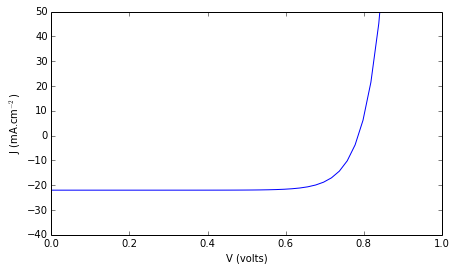

In [84]:
kB = 1.38e-23 #Boltzamnn constant
e = 1.602e-19 #electronic charge

def shockley(I0, n, T):
    '''Shockley equation for ideal diode'''
    units = 1e-12
    I = I0*units*(exp((e*V)/(n*kB*T))-1)
    return I

def J(I, area=1):
    '''Input area in cm**2
       Output J in mA.cm**-2'''
    J = I*1000/(area)
    return J
    

def plotJV(I0, n, T, JL):
    fig = figure(figsize(7,4))
    ax = fig.add_subplot(111)
    value = J(shockley(I0,n,T)) #get I
    ax.plot(V, J(value)-JL, '-') #plot J-JL vs V
    ax.set_xlabel('V (volts)')
    ax.set_ylabel('J (mA.cm$^{-2}$)')
    ax.set_xlim([0,1])
    ax.set_ylim([-40, 50])
    
    
from ipywidgets import *
#create sliders
I0_s = FloatSlider(min=1, max=1000, step=10, value=1)
n_s = FloatSlider(min=1, max=2, step=0.1, value = 1.5)
T_s = FloatSlider(min=20, max = 400, step = 1, value = 300)

#JL is the photocurrent (approximately equiv. to JSC)
JL_s = FloatSlider(min=0, max=30, step=1, value=0)

#bind sliders to plot
interactive(plotJV, I0=I0_s, n=n_s, T=T_s, JL=JL_s)
